In [1]:
# In this kernel, I am setting up my notebook so that I may run all my functions and add ons appropriately
from scipy import stats
from math import sqrt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
import prepare_kwame

In [2]:
df, train, validate, test, X_train, X_validate, X_test, y_train, y_validate, y_test = prepare_kwame.prepare_zillow()

In [3]:
df.head()

,parcelid,id,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt
0,14297519,1727539,3.5,4.0,3100.0,1023282.0
1,17052889,1387261,1.0,2.0,1465.0,464000.0
2,14186244,11677,2.0,3.0,1243.0,564778.0
3,12177905,2288172,3.0,4.0,2376.0,145143.0
4,10887214,1970746,3.0,3.0,1312.0,119407.0


<h3> Hypothesis Testing </h2>

First Hypothesis<br><br>
$H_0$: The number of bathrooms has no correlation on the tax estimated property value.<br>
$H_a$: The number of bathrooms has a correlation with the tax estimated property value.<br>

In [107]:
n = df.shape[0]     # number of observations
degf = n - 2        # degrees of freedom: the # of values in the final calculation of a statistic that are free to vary.
conf_interval = .95 # desired confidence interval
α = 1 - conf_interval

In [5]:
# Testing the 1st hypothesis
r, p = stats.pearsonr(df.bathroomcnt, df.taxvaluedollarcnt)
r, p

(0.471765070343626, 0.0)

In [6]:
#Comparing my p value against my α
p < α

True

In [64]:
#stating our results of the pearsons coefficent test
print("Since p is less than α, we reject our null hypothesis that bathroom has no effect on the tax estimated property value.")

Since p is less than α, we reject our null hypothesis that bathroom has no effect on the tax estimated property value.


Second Hypothesis<br><br>
$H_0$: There is no correlation between finished square feet and tax estimated property value.<br>
$H_a$: There is a correlation between finished square feet and tax estimated property value.<br>

In [8]:
n = df.shape[0]     # number of observations
degf = n - 2        # degrees of freedom: the # of values in the final calculation of a statistic that are free to vary.
conf_interval = .95 # desired confidence interval
α = 1 - conf_interval

In [9]:
# Testing the 1st hypothesis
r, p = stats.pearsonr(df.calculatedfinishedsquarefeet, df.taxvaluedollarcnt)
r, p

(0.583156301196327, 0.0)

In [10]:
#Comparing my p value against my α
p < α

True

In [66]:
#stating the results of the pearsons coefficent test
print("Since p is less than α, we reject our null hypothesis that there is no correlation between finished square feet and tax estimated property value.")

Since p is less than α, we reject our null hypothesis that there is no correlation between finished square feet and tax estimated property value.


In [122]:
# settting the random seed so that each reproduction will get the same numbers
np.random.seed(76)
#setting the plot sizes for the notebook
plt.figure(figsize=(20,10))

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

Text(0.5, 1.0, 'Correlation between Number of Bathrooms and Bedrooms')

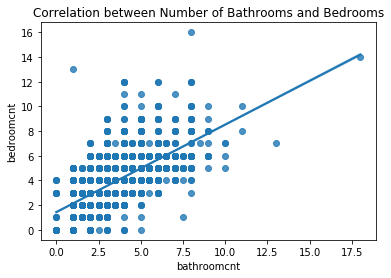

In [77]:
sns.regplot(data= train, x='bathroomcnt', y= 'bedroomcnt')
plt.title("Correlation between Number of Bathrooms and Bedrooms")

Text(0.5, 1, 'Relationship Plot of Train Data')

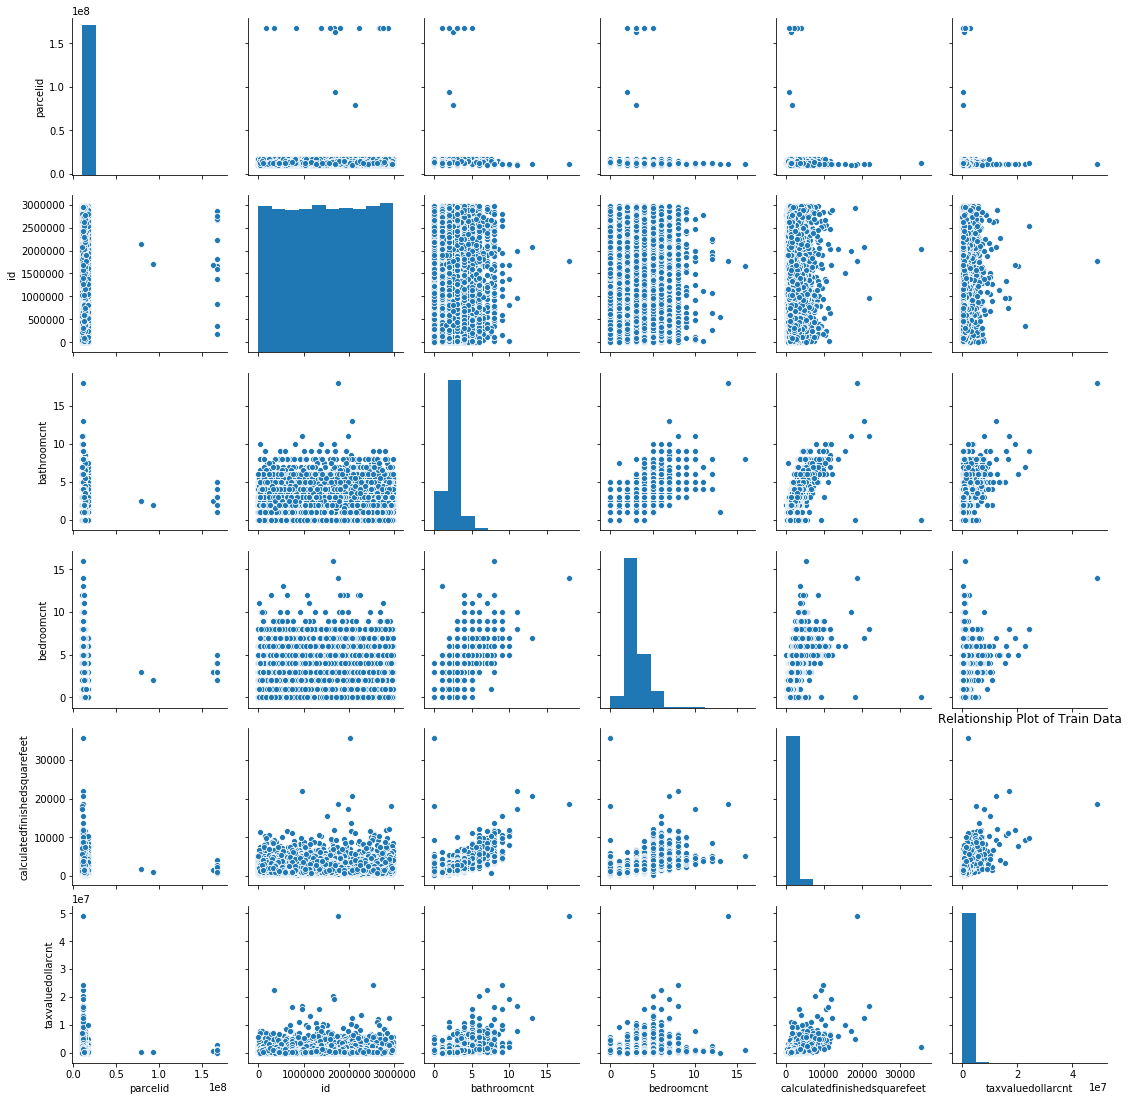

In [80]:
sns.pairplot(data=train)
plt.title('Relationship Plot of Train Data')

Text(0.5, 1, 'Jointplot of Trained Data')

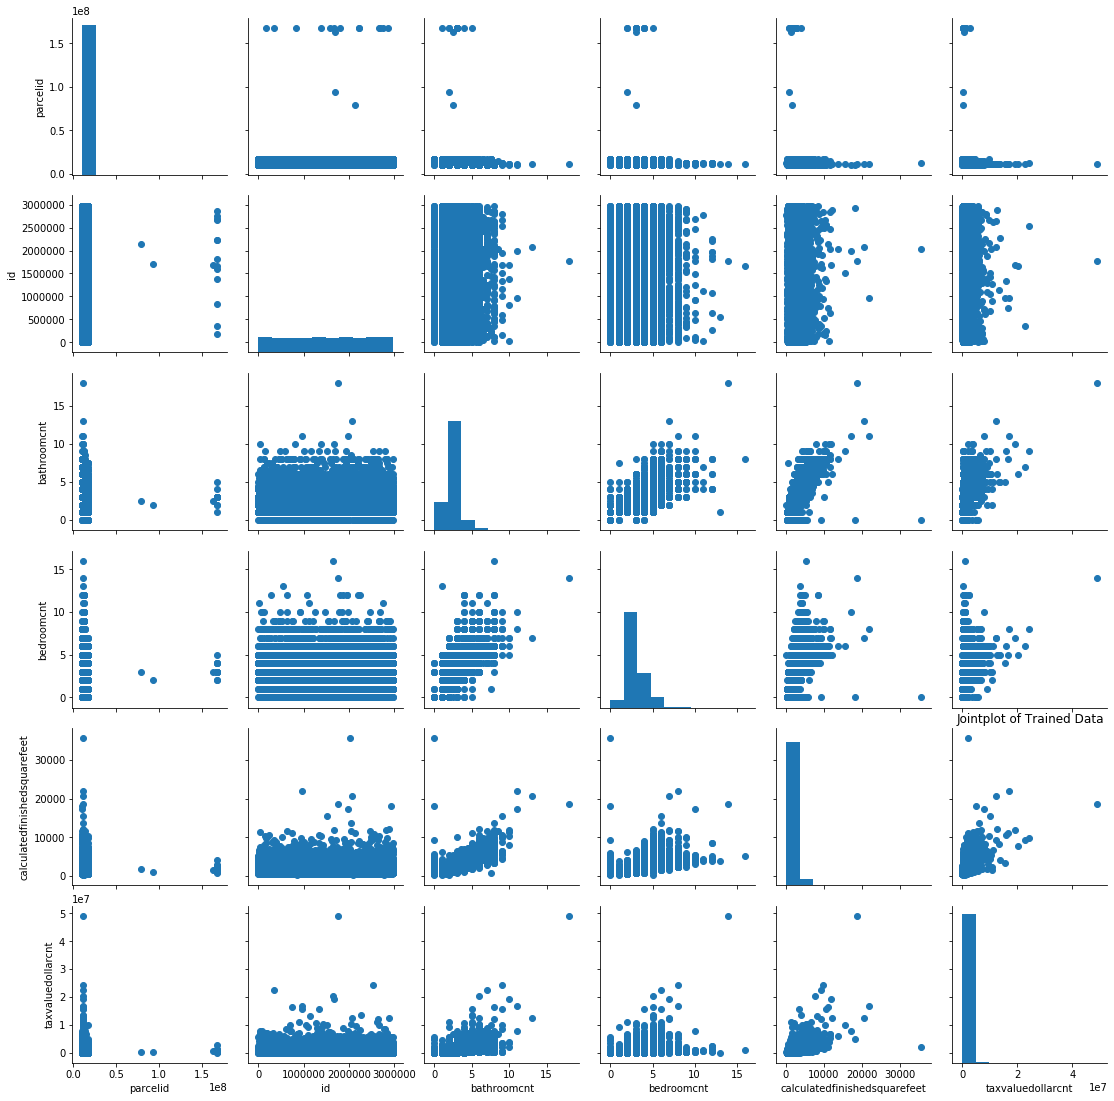

In [75]:
# This is roughly equivalent to sns.jointplot, but we see here that we have the
# flexibility to customize the type of the plots in each position.
g = sns.PairGrid(train)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);
plt.title("Jointplot of Trained Data")

(0, 4)

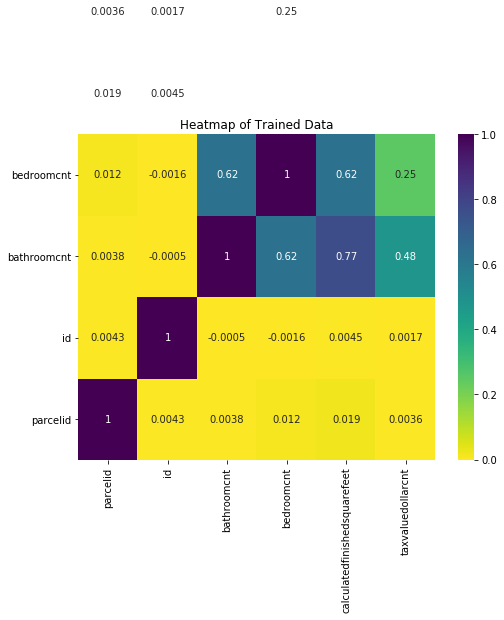

In [74]:
plt.figure(figsize=(8,6))
sns.heatmap(train.corr(), cmap='viridis_r', annot=True)
plt.title('Heatmap of Trained Data')
plt.ylim(0, 4)

Text(0, 0.5, 'Estimated Property Value by Tax Assessment (in hundred thousands)')

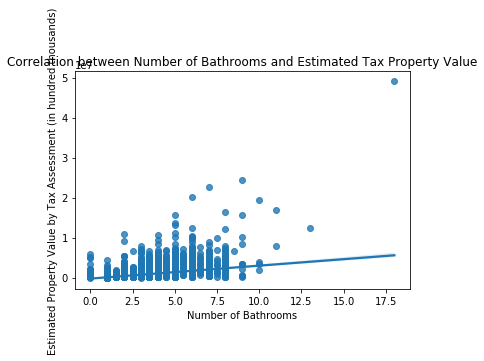

In [98]:
#evaluating tax value assessment to number of bathrooms
sns.regplot(data= train, x='bathroomcnt', y= 'taxvaluedollarcnt')
plt.title("Correlation between Number of Bathrooms and Estimated Tax Property Value")
plt.xlabel('Number of Bathrooms')
plt.ylabel('Estimated Property Value by Tax Assessment (in hundred thousands)')

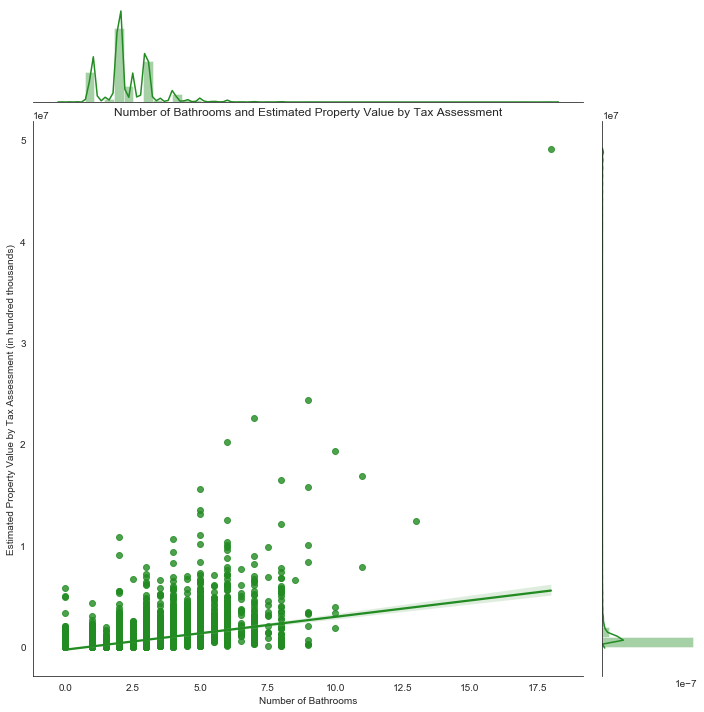

In [85]:
# evaluating tax home value estimate to number of bathrooms
with sns.axes_style('white'):
    j = sns.jointplot( "bathroomcnt", "taxvaluedollarcnt",data=train, kind='reg', height=10, color= 'ForestGreen');
    plt.xlabel('Number of Bathrooms')
    plt.ylabel('Estimated Property Value by Tax Assessment (in hundred thousands)')
    plt.title ('Number of Bathrooms and Estimated Property Value by Tax Assessment')
    plt.show()

Text(0, 0.5, 'Estimated Property Value by Tax Assessment \n (in hundred thousands)')

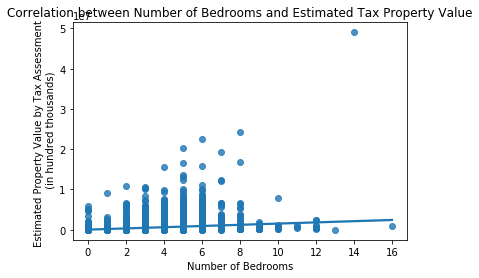

In [117]:
#evaluating tax value assessment to number of bedrooms
sns.regplot(data= train, x='bedroomcnt', y= 'taxvaluedollarcnt')
plt.title("Correlation between Number of Bedrooms and Estimated Tax Property Value")
plt.xlabel('Number of Bedrooms')
plt.ylabel('Estimated Property Value by Tax Assessment \n (in hundred thousands)')

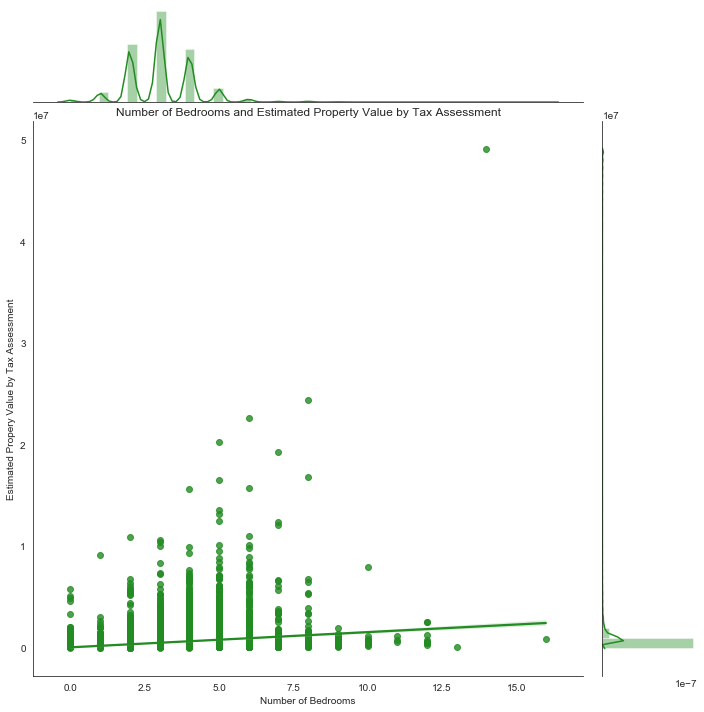

In [38]:
#evaluating tax value assessment to number of bedrooms
with sns.axes_style('white'):
    j = sns.jointplot( "bedroomcnt", "taxvaluedollarcnt",data=train, kind='reg', height=10, color= 'ForestGreen');
    plt.xlabel('Number of Bedrooms')
    plt.ylabel('Estimated Property Value by Tax Assessment (in hundred thousands)')
    plt.title ('Number of Bedrooms and Estimated Property Value by Tax Assessment')
    plt.show()

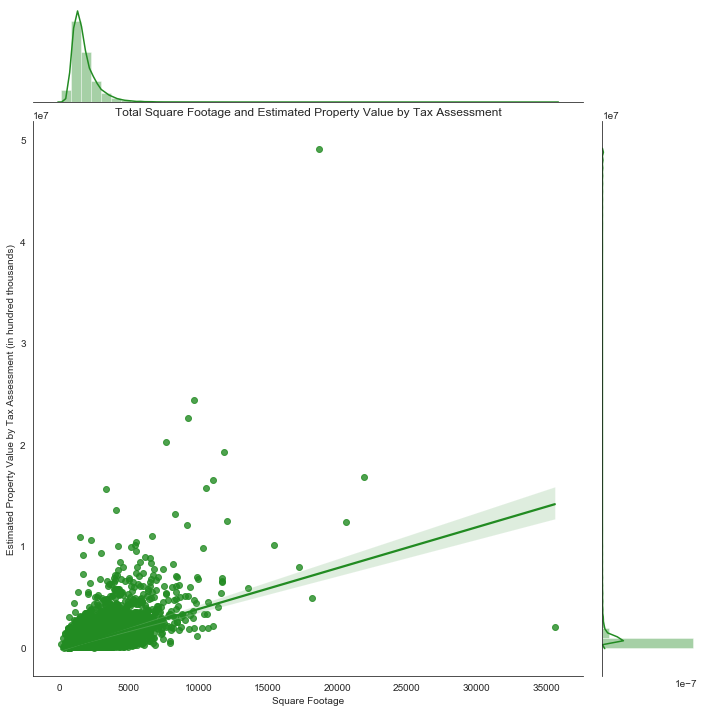

In [90]:
#evaluating tax value assessment to number of bedrooms
with sns.axes_style('white'):
    j = sns.jointplot( "calculatedfinishedsquarefeet", "taxvaluedollarcnt",data=train, kind='reg', height=10, color= 'ForestGreen');
    plt.xlabel('Square Footage')
    plt.ylabel('Estimated Property Value by Tax Assessment (in hundred thousands)')
    plt.title ('Total Square Footage and Estimated Property Value by Tax Assessment')
    plt.show()

In [60]:
# sort = false will sort the bin values as opposed to the frequency counts
# value counts of tax_value_dollar_count by binning
train.taxvaluedollarcnt.value_counts(bins=10, sort=False)

(-45803.983, 4909052.2]     43206
(4909052.2, 9814850.4]        102
(9814850.4, 14720648.6]        14
(14720648.6, 19626446.8]        5
(19626446.8, 24532245.0]        3
(24532245.0, 29438043.2]        0
(29438043.2, 34343841.4]        0
(34343841.4, 39249639.6]        0
(39249639.6, 44155437.8]        0
(44155437.8, 49061236.0]        1
Name: taxvaluedollarcnt, dtype: int64

In [111]:
#Finding the median of the Tax Estimated Property Value
df.taxvaluedollarcnt.median()

358878.0

In [113]:
#Finding the median amount of bathrooms
df.bathroomcnt.median()

2.0

In [115]:
#Finding the median amount of bathrooms
df.bedroomcnt.median()

3.0

In [116]:
#Finding the median square feet
df.calculatedfinishedsquarefeet.median()

1542.0

In [37]:
#Making a baseline prediction for tax estimated property value
df.taxvaluedollarcnt.value_counts()

400000.0    56
600000.0    50
350000.0    49
450000.0    45
420000.0    44
            ..
302897.0     1
144306.0     1
124876.0     1
247786.0     1
98304.0      1
Name: taxvaluedollarcnt, Length: 50811, dtype: int64

Therefore the baseline prediction is that the tax estimated property value is $400,000.

<h2> Takeaways from this iteration of exploration: </h2>
    <ul>
    <li> The baseline prediction is that the tax estimated property value is $400,000. </li>
    <li> The median of the tax estimated property value count is $358,878.</li>
    <li> The median number of bedrooms is 3 bedrooms and bathrooms is 2 bathrooms.</li>
    <li> The median finished square footage of the properties are 1542 square feet.</li>
    <li>There is a correlation between total square footage and bathroom counts with estimated tax property values.</li>
    </ul>
<h2> Recommendations for future iterations: </h2>
    <ul>
    <li>Add in tax assessment to calculate tax rate by divided by property worth.</li>
    <li>Add in lot size to calculate correlation between estimated property tax value and lot square feet</li>
    <li>Assess the the differences in tax amounts by different geographical areas.</li>
    <li>Pull over more discrete variables to be able to create different plots and cross tabulations for comparing. </li>
    </ul>